In [58]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Instructions

## **Assignment Instructions**

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* **How to run this on google colab**: Uncomment the below code and replace wherever necessary to run this assignment on google colab (only if you want to - jupyter notebooks work just fine)

In [59]:
#Linking google colab to your drive folder
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

In [60]:
#Replace 'Assignment 2 DS' with the path of the folder of your assignment
#%cd /content/gdrive/My\ Drive/Assignment 2 DS

## **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

## **Grading**

Grading is broken down into autograded answers and free response.

* For autograded answers, the results of your code are compared to provided and/or hidden tests.

* For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

* **Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?**


# **World Happiness Report**

## **Introduction**

Happiness has always been one of those fluctuating emotional states for humans, perhaps more so in light of recent events. With reports by 'World Happiness Report', publication of the Sustainable Development Solutions Network, coming in every year, you have decided to embark on a journey to uncover just how happy the citizens of countries around the world perceive themselves to be. 

But how can happiness be measured? Are there reliable comparisons of happiness across time and space that can give us clues regarding what makes people or even countries to declare themselves as ‘happy’? Well, this is exactly what our task is.

In this assignment, we aim to analyse the data and empirical evidence that might answer these questions. Our focus here will be on survey-based measures of self-reported happiness and life satisfaction. 



## **Importing Libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

## **Loading Data**

In [62]:
df_2015 = pd.read_pickle('cleaned_2015.pkl')
df_2017 = pd.read_pickle('cleaned_2017.pkl')
df_2019 = pd.read_pickle('cleaned_2019.pkl')

## **Exploratory Data Analysis**

### **EDA Part 1: Distributions**

In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed.

Are there any variables across all years which are skewed?

<!-- BEGIN QUESTION -->

**Question 1:** Use kernel estimation density plots to observe the skewness in each variable across the three years: 2015, 2017 and 2019. If you think there is any variable that does not need to be plotted, leave a rationale for it in the form of a comment before the graphs code.

*Tip: You can use for loops to keep your code concise*

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. Make sure each variable has **one** figure, displaying the skewness for the three years mentioned above in the same figure.  

<!--
BEGIN QUESTION
name: q1
points: 8
manual: true
-->

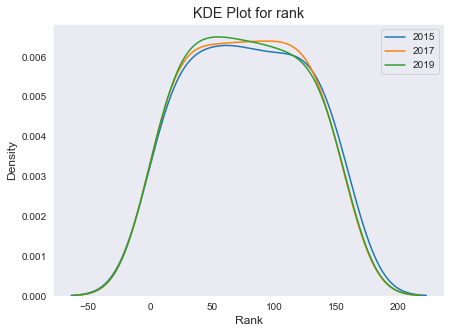

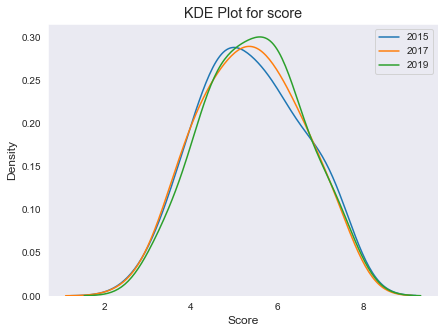

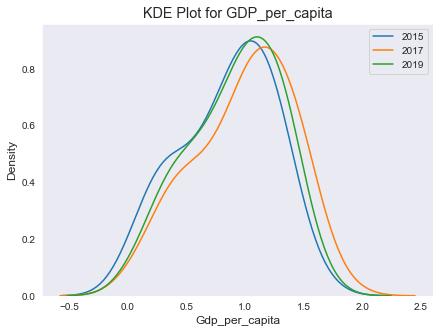

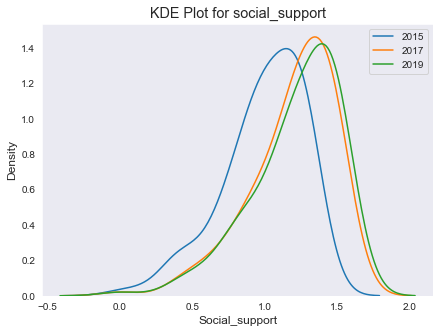

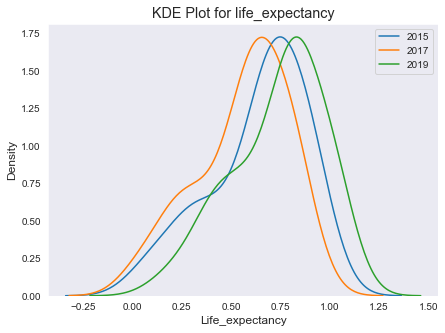

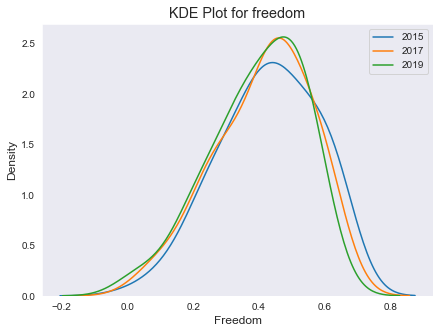

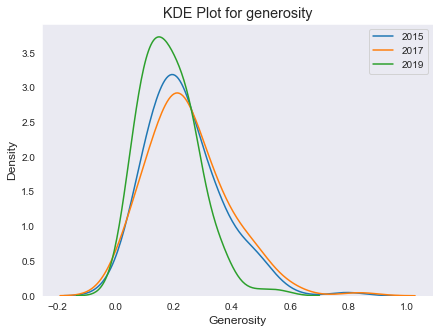

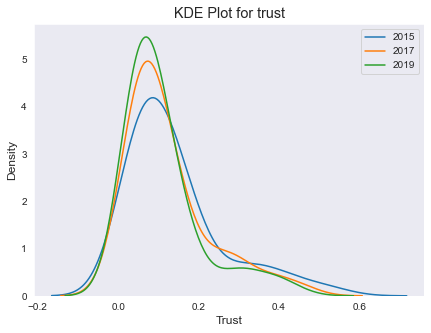

In [63]:
## solution ##
sns.set_style("dark")
for x in df_2019.columns:
    if df_2019[x].dtype != 'object':
        fig, ax = plt.subplots()
        plot1 = sns.kdeplot(data = df_2015[x], bw_adjust=1.25, ax=ax, label='2015')
        plot1 = sns.kdeplot(data = df_2017[x], bw_adjust=1.25, ax=ax, label='2017')
        plot1 = sns.kdeplot(data = df_2019[x], bw_adjust=1.25, ax=ax, label='2019')
        plot1.set_title("KDE Plot for " + x, fontsize='x-large')
        plot1.set_ylabel("Density", fontsize='large')
        plot1.set_xlabel(x.capitalize(), fontsize='large')
        fig = plt.gcf()
        fig.set_size_inches(7, 5)

        plt.legend()
        plt.show()
        


<!-- END QUESTION -->

**Question 2:** Calculate skew values for each variable using an appropriate function.

*Answering Guidelines*: Assign the skew values for each dataframe to the placeholders given below in the code cell. 

<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [64]:
df_2015_skew = df_2015.skew(axis = 0)
df_2017_skew = df_2017.skew(axis = 0)
df_2019_skew = df_2019.skew(axis = 0)
df_2019_skew


rank               0.041760
score              0.005389
GDP_per_capita    -0.378676
social_support    -1.206617
life_expectancy   -0.616017
freedom           -0.643707
generosity         0.820221
trust              1.729062
dtype: float64

In [65]:
grader.check("q2")

All tests passed!

<!-- BEGIN QUESTION -->

*Question 3:* **Briefly** comment on the type of skewness of each variable. 

*Answering Guidelines*: As shown by the plots in the previous question, you need not differentiate variables year-wise while commenting on whether a certain variable is right or left skewed since there is consistency in this pattern. A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->

trust: it is right skewed
generosity: It is right skewed
freedom: It is left skewed
life_expectancy: It is left skewed
social_support: It is left skewed
rank: nominal skew
scor: nominal skew

<!-- END QUESTION -->



### **EDA Part 2: Happiness in 2019**

It's common knowledge that Scandinivia and some other parts of Western Europe consist of countries that are ranked high in happiness, whereas some countries belonging to regions like Africa or Asia are far from being labelled happy. However, the reason we asked you to incorporate the *regions* column into 2019, is to enable you to resolve your curosity of what the world looked like in terms of happiness in 2019.


#### **2A: Region Wise Analysis**

<!-- BEGIN QUESTION -->

**Question 4:** Make use of a bar plot to plot the Happiness Score for all regions across the world. Add a horizontal line for average happiness score on the plot. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q4_1
points: 3
manual: true
-->

5.775439432773108


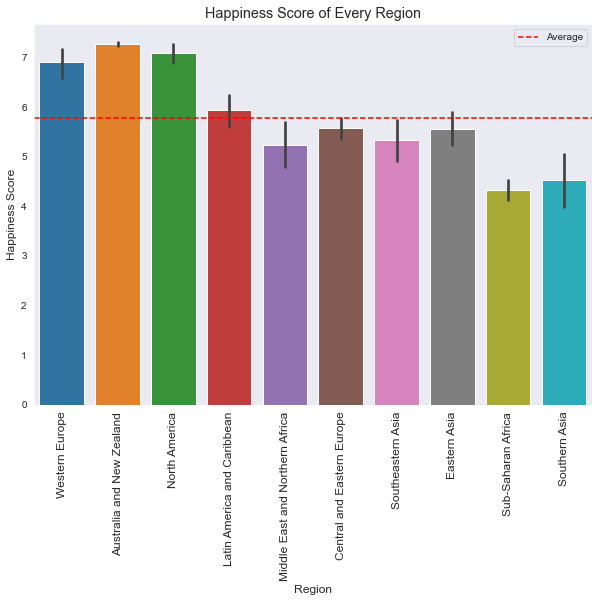

In [66]:
## solution ##
mean = df_2019[['region', 'score']].groupby('region').mean().mean()[0]
print(mean)
q4plot = sns.barplot(data=df_2019, x='region', y='score')
q4plot.axhline(mean, color= "red", label='Average', ls='--')
q4plot.set_title("Happiness Score of Every Region", fontsize='x-large')
q4plot.set_ylabel("Happiness Score", fontsize='large')
q4plot.set_xlabel("Region", fontsize='large')
q4plot.legend()
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large'  
)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comment on whether you think the world is a happy place? 

*Answering Guidelines*: a placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q4_2
points: 1
manual: true
-->

I think the world generally is not a happy place. There are regions which are happy i.e. Australia and Newzeland, Western Europe and North America. These are the only 3 regions which ase considerably above average. 6 regions are below the average hapiness score while one region i.e Latin America and Caribbean is barely above average. I think seeing these we can interpret that although some places in the world are happy places but the world in general is not a happy place. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5:** Make use of a Box Plot to get a complete picture of the variation in Happiness Score across regions.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q5
points: 2
manual: true
-->

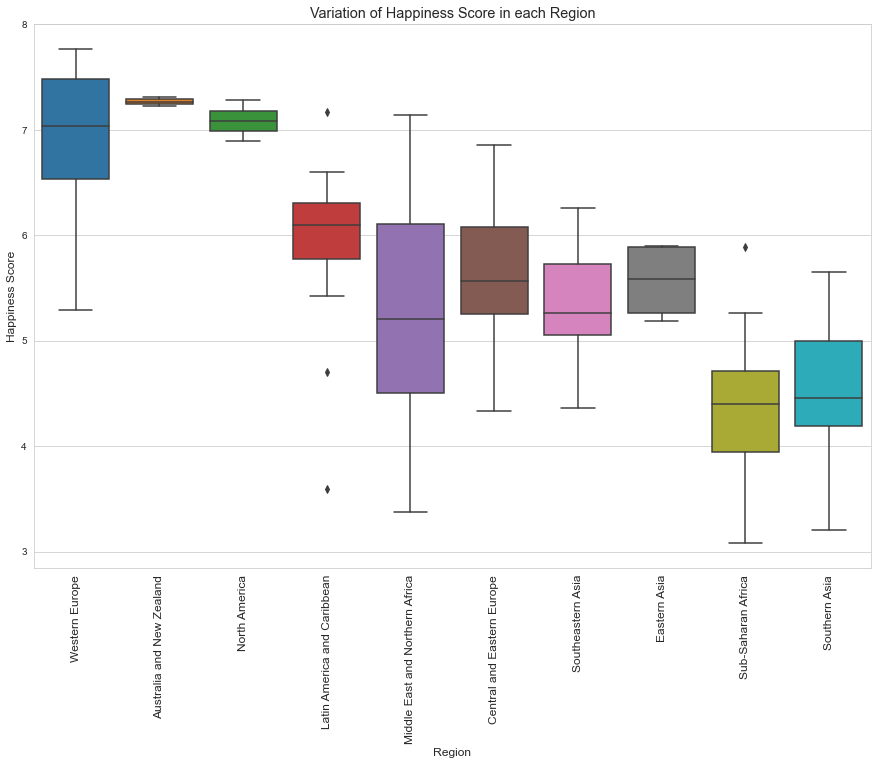

In [67]:
## solution ##
sns.set_style("whitegrid")

q5plot = sns.boxplot(data=df_2019, x='region', y='score')
q5plot.set_title("Variation of Happiness Score in each Region", fontsize='x-large')
q5plot.set_ylabel("Happiness Score", fontsize='large')
q5plot.set_xlabel("Region", fontsize='large')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large'  
)

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6:** Use the most suitable visualization to display the number of countries within each region. Leave your rationale in the form of a comment in the same code cell.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q6
points: 2
manual: true
-->

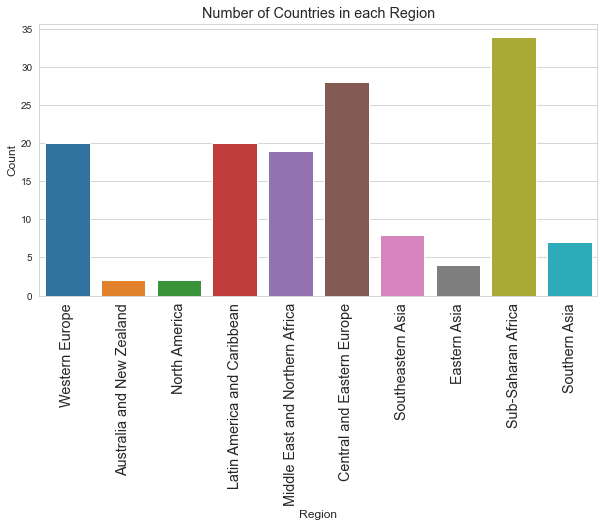

In [68]:
# I am using countplot which plots a bar chart for count. Bar chart allows for quantitative data to be plotted. 
# The reason for preferring it over others is becuase data is categorized and bar chart is the best choice to compare 
# something across categories

sns.set_style("whitegrid")

q6plot = sns.countplot(x = df_2019['region'])
q6plot.set_title("Number of Countries in each Region", fontsize='x-large')
q6plot.set_ylabel("Count", fontsize='large')
q6plot.set_xlabel("Region", fontsize='large')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='x-large'  
)

plt.show()



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 7:** Using the visualizations above, comment on whether comparing happiness region-wise is a good idea? What do the results suggest?

*Answering Guidelines*: a placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q7
points: 1
manual: true
-->

I dont think it is a good idea as some regions such as North America, Eastern Africa, Australia and New Zealand, etc have very few countires as compared to Central and Eastern Europe, Sub-Saharan Africa, etc which have a lot of countries so there is a huge variation

<!-- END QUESTION -->



#### **2B: Country Wise Analysis**

<!-- BEGIN QUESTION -->

**Question 8:** Make use of a bar plot to display the Happiness Score for the top 10 happiest countries across the world in descending order of happiness score. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q8
points: 2
manual: true
-->

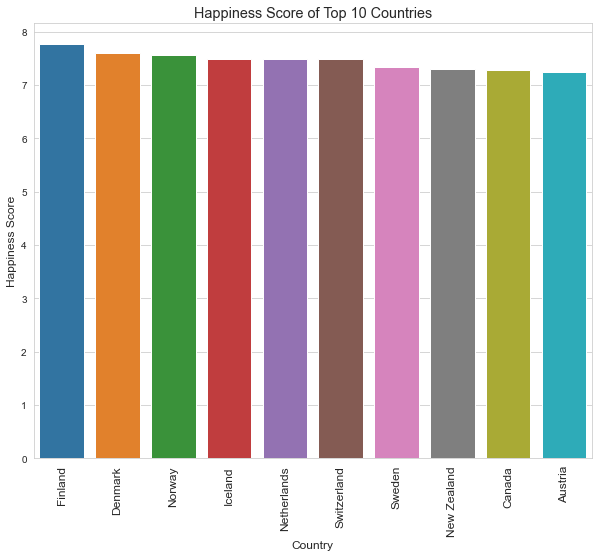

In [69]:
## solution ##

sns.set_style("whitegrid")
q8plot = sns.barplot(data=df_2019.head(10), x='country', y='score')
q8plot.set_title("Happiness Score of Top 10 Countries", fontsize='x-large')
q8plot.set_ylabel("Happiness Score", fontsize='large')
q8plot.set_xlabel("Country", fontsize='large')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large'  
)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 9:** State the country that looks the most happy and suggest reasons as to why it maybe so.

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
* You need not consult the data specifically for reasons - answer as if you are building an intuition for what could the possible reasons be.


<!--
BEGIN QUESTION
name: q9
points: 1
manual: true
-->

Finland is the happiest country and the reason could be that their basic needs are met by the government, the wellbeing of people is a priority, they have social and economic security and live a healthy life style. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 10:** Make use of a bar plot to display the Happiness Score for the 10 least happy countries across the world in descending order of happiness score. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. 

<!--
BEGIN QUESTION
name: q10
points: 2
manual: true
-->

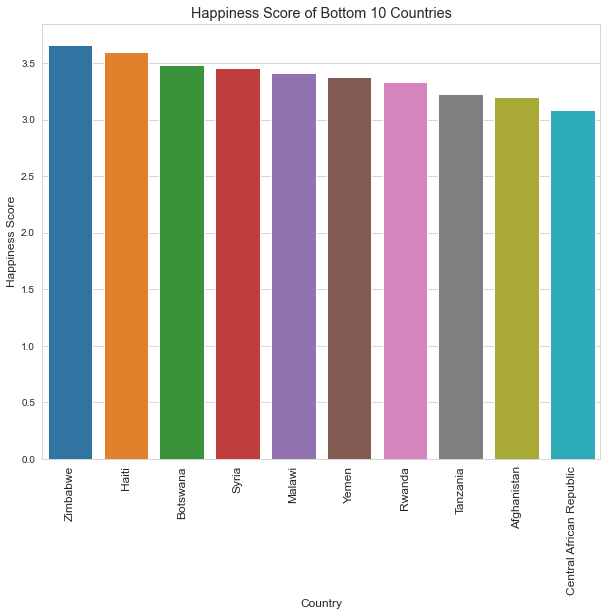

In [70]:
df_2019.tail(10)
## solution ##
sns.set_style("whitegrid")
q8plot = sns.barplot(data=df_2019.tail(10), x='country', y='score')
q8plot.set_title("Happiness Score of Bottom 10 Countries", fontsize='x-large')
q8plot.set_ylabel("Happiness Score", fontsize='large')
q8plot.set_xlabel("Country", fontsize='large')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large'  
)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 11:** State the country that looks the least happy and suggest reasons as to why it may be so?

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.
* You need not consult the data specifically for reasons - answer as if you are building an intuition for what could the possible reasons be.

<!--
BEGIN QUESTION
name: q11
points: 1
manual: true
-->

Central African Republic is the least happiest country. The reason could be poverty, lack of resources, law and order problems and troubled economy.

<!-- END QUESTION -->



Now that you've carefully thought about the underlying reasons behind the previously shown variations in happiness, it is time for you to use the data to come up with possible reasons and factors.


<!-- BEGIN QUESTION -->

**Question 12:** Show the relationship between all the variables in the form of a correlation matrix.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots. We do not expect you to be well versed with correlation coefficients so feel free to skip that detail for now.

<!--
BEGIN QUESTION
name: q12
points: 2
manual: true
-->

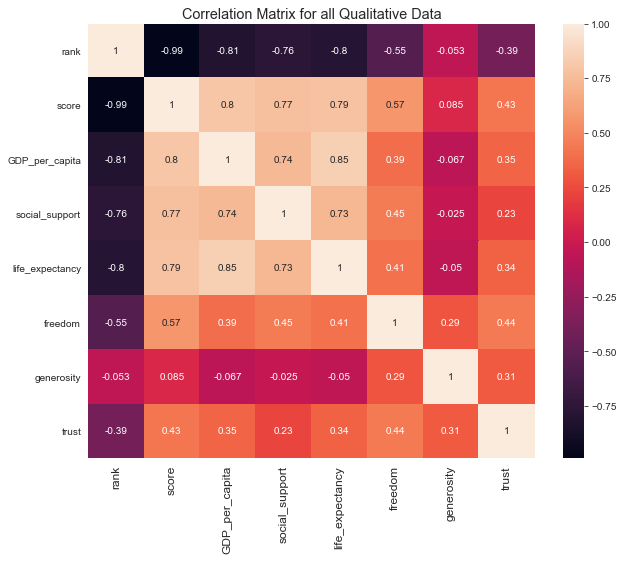

In [71]:
## solution ##
q12plot = sns.heatmap(
    df_2019[['rank', 'score', 'GDP_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'trust']].corr(), 
            annot=True)

q12plot.set_title("Correlation Matrix for all Qualitative Data", fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontsize='large'  
)
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 13:** What does the output above indicate? Briefly indicate which relationships seem significant, and describe how so (linear, positive, negative etc). 

*Tip:* The following article is a good read: https://www.statology.org/how-to-read-a-correlation-matrix/

*Answering Guidelines*: A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed and make sure to clearly show your rationale.

<!--
BEGIN QUESTION
name: q13
points: 3
manual: true
-->

GDP_per_capita and score, social_support and score, life_expectancy and score are strongly and positevely correlated with each other. Simillarly social_support and GDP_per_capita, life_expectancy and GDP_per_capita are strongly and positevely correlated with each other. Social_support and life_expectancy are also strongly and positevely correlated with each other. Genorisity has almost linear correlation with every variable except trust and freedom thus generosity has very negligable affect on the other variables. Rank has strong negative correlation with GDP_per_capita, life_expectancy and social_support. That is becuase greater value in these variables means better rank and smaller the rank the better it is. Score and rank have almost linear correlation because score determines rank. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 14:** Another way of visualizing relationships is using scatterplots. Use scatterplots to display how Happiness Score is affected every other variable in the data.

*Answering Guidelines*: 
* Follow the instructions given in the 'Grading' section with regards to plots. 
* Make sure to display every variable against Happiness score.
* Make use of a for loop or subplots to display all the plots through one code cell.
<!--
BEGIN QUESTION
name: q14
points: 14
manual: true
-->

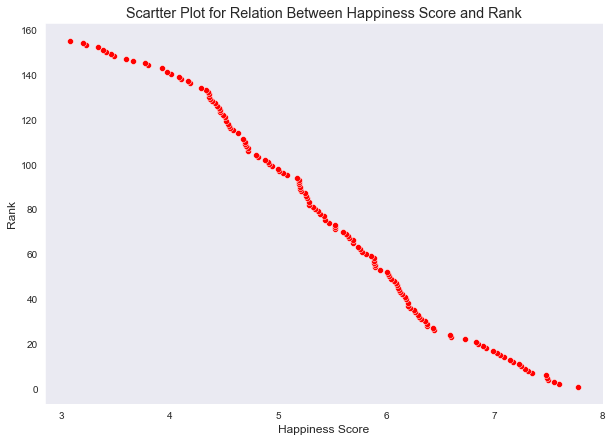

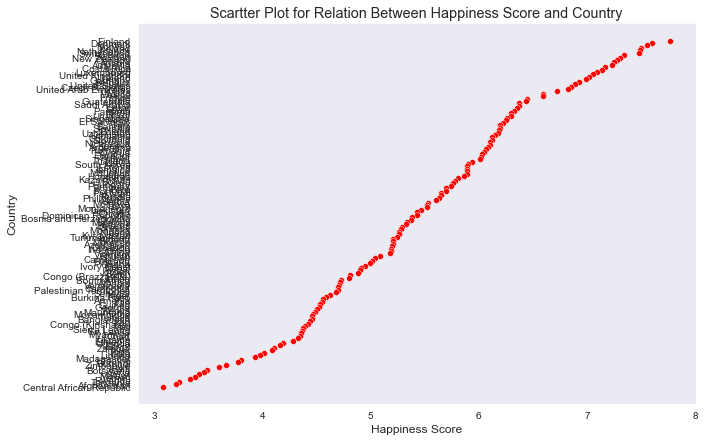

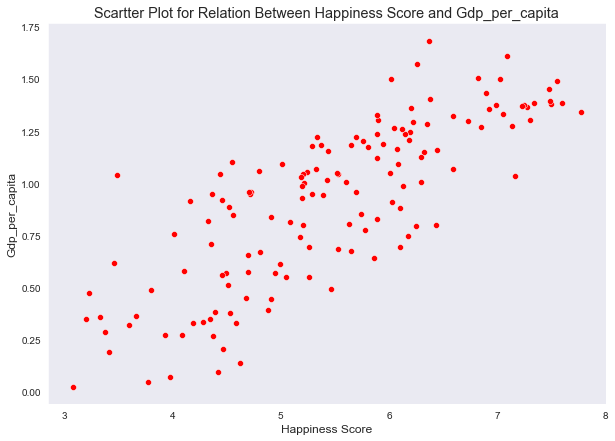

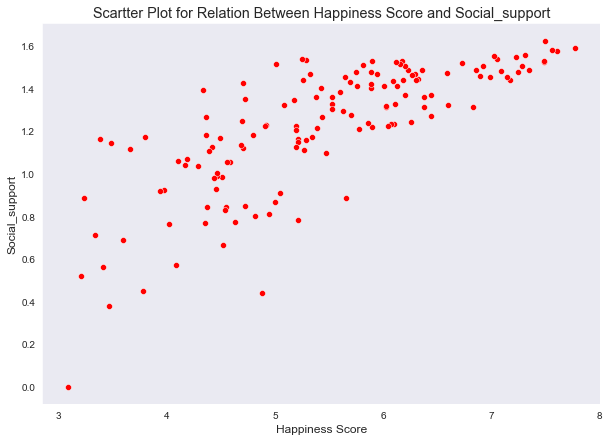

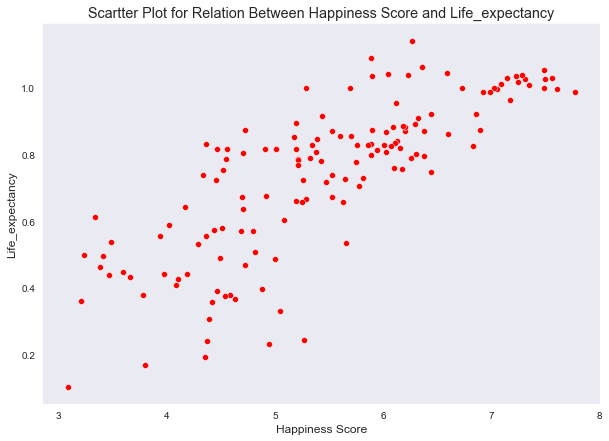

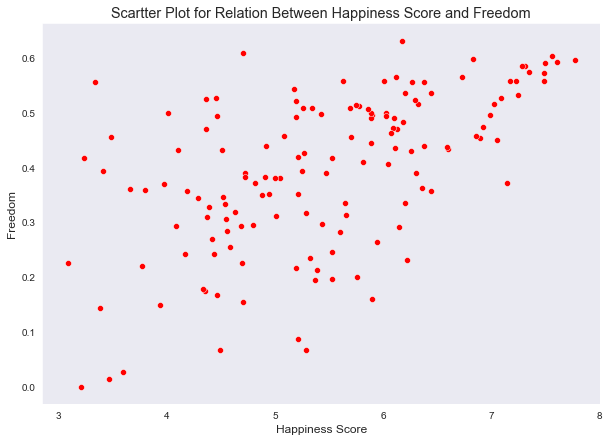

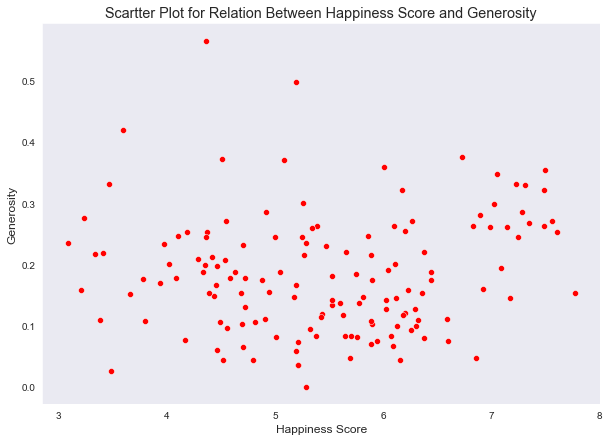

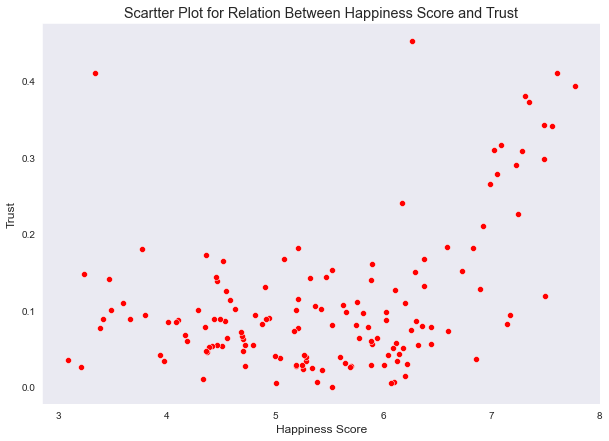

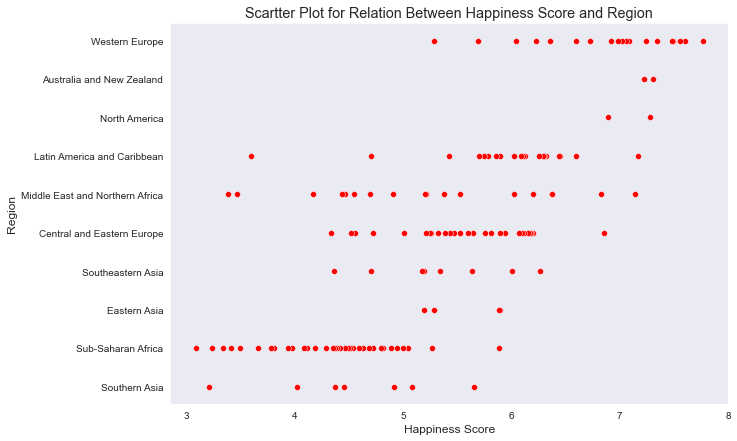

In [72]:
## solution ##
sns.set_style("dark")
for this_var in df_2019.columns:
    if this_var != 'score':
            plot2 = sns.scatterplot(data=df_2019, x='score', y=this_var, color ='red')
            plot2.set_title("Scartter Plot for Relation Between Happiness Score and " + this_var.capitalize(), fontsize='x-large')
            plot2.set_ylabel(this_var.capitalize(), fontsize='large')
            plot2.set_xlabel('Happiness Score', fontsize='large')
            fig = plt.gcf()
            fig.set_size_inches(10, 7)

            plt.show()


<!-- END QUESTION -->



#### **2C: A Trip To The Past**

Now that you have fairly understood the trend in happiness score within a single year, it is time to take a look at what's been happening over the past 4 years - were the countries always this happy/sad? 

The task at hand is to compare the trend of the happiness score for the top 10 happiest countries in 2019 over the last 4 years.

**Question 15:** Extract the top 10 happiest countries from the 2019 dataset and combine their happiness scores from 2017 and 2015, all in one dataset.

*Answering Guidelines*: 
* ```history``` must have an additional 'year' columns which contains information of which year the particular data point is from. Feel free to add such a column since it is not part of your original dataset.
* ```history``` must have three data points corresponding to the three years for every country.
* Make sure there are no extra columns while making the ```history``` table. If such columns make it to the table, make sure to drop them.

<!--
BEGIN QUESTION
name: q15
points: 5
-->

In [73]:
df_2019_new = df_2019.head(10) 
df_2019_new['year'] = 2019
df_2015_new = df_2015.copy()
df_2017_new = df_2017.copy()
df_2017_new['year'] = 2017
df_2015_new['year'] = 2015


df_2017_cut = df_2017_new[df_2017_new['country'].isin(df_2019_new['country'])]
df_2015_cut = df_2015_new[df_2015_new['country'].isin(df_2019_new['country'])]

# print(df_2015_cut)
# print(df_2017_cut)
# print(df_2019_new)

pre_history = df_2015_cut.append(df_2017_cut)
history = pre_history.append(df_2019_new, ignore_index = True)

display(history)


<ipython-input-73-9b584fe3803c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_new['year'] = 2019


,country,region,rank,score,GDP_per_capita,social_support,life_expectancy,freedom,trust,generosity,year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
5,Finland,Western Europe,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2015
6,Netherlands,Western Europe,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2015
7,Sweden,Western Europe,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2015
9,Austria,Western Europe,13,7.200,1.337230,1.297040,0.890420,0.624330,0.186760,0.330880,2015


In [74]:
grader.check("q15")

All tests passed!

**Question 16:** To plot the Happiness Scores of the 10 countries across 4 years, we would need to ensure that the dataframe has a logical structure to it. 

One of the ways in which this could be done is using ```.pivot_table()```. Think of what could be the most logical structure to visualize this information in the form of a table, and use the function to ensure such a structure.

*Answering Guidelines*: Store the output in the ```history_table```

<!--
BEGIN QUESTION
name: q16
points: 5
-->

In [75]:
history_table = history.pivot_table(index=['country', 'year'])
display(history_table)
history_table.shape


GDP_per_capita   freedom  generosity  life_expectancy  rank  \
country     year                                                                
Austria     2015        1.337230  0.624330    0.330880         0.890420    13   
            2017        1.487097  0.567766    0.316472         0.815328    13   
            2019        1.376000  0.532000    0.244000         1.016000    10   
Canada      2015        1.326290  0.632970    0.458110         0.905630     5   
            2017        1.479204  0.611101    0.435540         0.834558     7   
            2019        1.365000  0.584000    0.285000         1.039000     9   
Denmark     2015        1.325480  0.649380    0.341390         0.874640     3   
            2017        1.482383  0.626007    0.355280         0.792566     2   
            2019        1.383000  0.592000    0.252000         0.996000     2   
Finland     2015        1.290250  0.641690    0.233510         0.889110     6   
            2017        1.443572  0.617951    0.245483         0.809158     5   
            2019        1.340000  0.596000    0.153000         0.986000     1   
Iceland     2015        1.302320  0.628770    0.436300         0.947840     2   
            2017        1.480633  0.627163    0.475540         0.833552     3   
            2019        1.380000  0.591000    0.354000         1.026000     4   
Netherlands 2015        1.329440  0.615760    0.476100         0.892840     7   
            2017        1.503945  0.585384    0.470490         0.810696     6   
            2019        1.396000  0.557000    0.322000         0.999000     5   
New Zealand 2015        1.250180  0.639380    0.475010         0.908370     9   
            2017        1.405706  0.614062    0.500005         0.816760     8   
            2019        1.303000  0.585000    0.330000         1.026000     8   
Norway      2015        1.459000  0.669730    0.346990         0.885210     4   
            2017        1.616463  0.635423    0.362012         0.796667     1   
            2019        1.488000  0.603000    0.271000         1.028000     3   
Sweden      2015        1.331710  0.659800    0.362620         0.910870     8   
            2017        1.494387  0.612924    0.385399         0.830875     9   
            2019        1.387000  0.574000    0.267000         1.009000     7   
Switzerland 2015        1.396510  0.665570    0.296780         0.941430     1   
            2017        1.564980  0.620071    0.290549         0.858131     4   
            2019        1.452000  0.572000    0.263000         1.052000     6   

                  score  social_support     trust  
country     year                                   
Austria     2015  7.200        1.297040  0.186760  
            2017  7.006        1.459945  0.221060  
            2019  7.246        1.475000  0.226000  
Canada      2015  7.427        1.322610  0.329570  
            2017  7.316        1.481349  0.287372  
            2019  7.278        1.505000  0.308000  
Denmark     2015  7.527        1.360580  0.483570  
            2017  7.522        1.551122  0.400770  
            2019  7.600        1.573000  0.410000  
Finland     2015  7.406        1.318260  0.413720  
            2017  7.469        1.540247  0.382612  
            2019  7.769        1.587000  0.393000  
Iceland     2015  7.561        1.402230  0.141450  
            2017  7.504        1.610574  0.153527  
            2019  7.494        1.624000  0.118000  
Netherlands 2015  7.378        1.280170  0.318140  
            2017  7.377        1.428939  0.282662  
            2019  7.488        1.522000  0.298000  
New Zealand 2015  7.286        1.319670  0.429220  
            2017  7.314        1.548195  0.382817  
            2019  7.307        1.557000  0.380000  
Norway      2015  7.522        1.330950  0.365030  
            2017  7.537        1.533524  0.315964  
            2019  7.554        1.582000  0.341000  
Sweden      2015  7.364        1.289070  0.438440  
            2017  7.2

(30, 8)

In [76]:
grader.check("q16")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 17:** Make use of a line plot to display the trend in Happiness Scores for all the 10 countries across the 4 years.

*Answering Guidelines*: 
* Follow the instructions given in the 'Grading' section with regards to plots. 
* The countries must be all in the same plot

<!--
BEGIN QUESTION
name: q17
points: 3
manual: true
-->

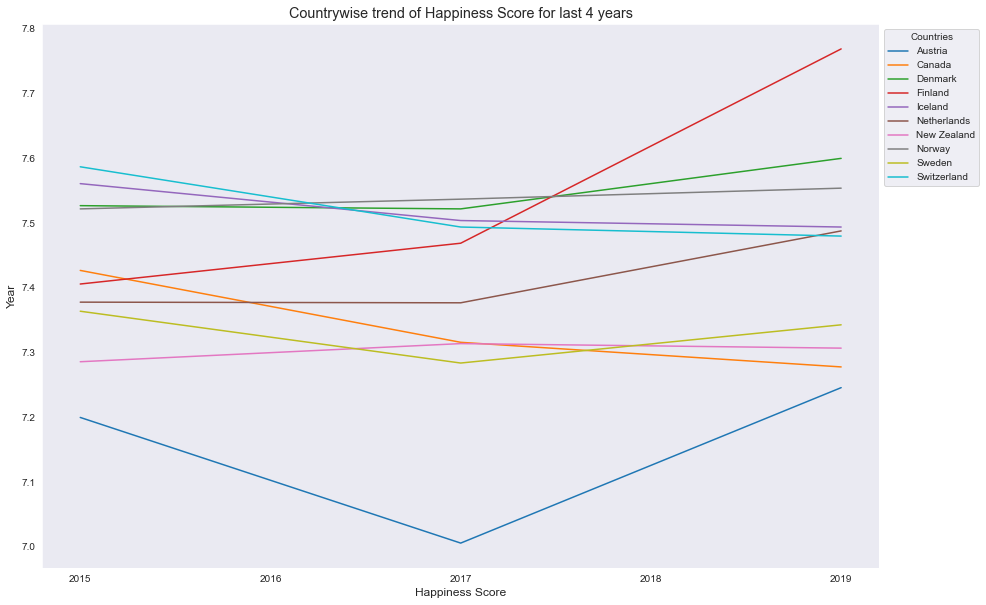

In [77]:
sns.set_style("dark")

myplot3 = sns.lineplot(data= history_table, y='score', x='year', hue='country')
myplot3.set_xticks([2015, 2016, 2017, 2018, 2019 ])
myplot3.set_title("Countrywise trend of Happiness Score for last 4 years", fontsize='x-large')
myplot3.set_ylabel('Year', fontsize='large')
myplot3.set_xlabel('Happiness Score', fontsize='large')

fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.legend(title = 'Countries', bbox_to_anchor=(1, 1), loc='upper left')


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 18:** Using the Line Plot above, list down all countries showing a consistent trend (positive or negative).

*Answering Guidelines*: A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q18
points: 1
manual: true
-->

Finland, Canada, Switzerland, Iceland, Norway


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 19:** From the list in the previous question, pick any 3 countries and perform a manual observation to see whether any variables might be contributing to the trend shown. For any such country, also suggest a suitable plot for visualizing the affects. 

*Answering Guidelines*: 
* A placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed
* If you think there are no such factors, simply mention that. The purpose of this question is to see your rationale.


<!--
BEGIN QUESTION
name: q19
points: 3
manual: true
-->

For Canada their freedom value is continiously falling so that could be one reason for the people to not be happy as they are finding their freedom to be compromised and that is why there is a declining trend in thier score. The same holds true for Iceland too as they also observe a simillar trend. Switzerland while also seeing a decline in their freedom score also observe a decline in the trust score which shows that their trust towards their government is decreasing. There is also a declining trend observed in the generosity score in Switzerland. The decline in freedom as well as trust must be contriubuting to decline in Hapiness Score of Switzerland while the decreasing generosity can also be a factor. We can visualise this using line plot as it is the best way to observe a trend. 

<!-- END QUESTION -->



# Congratulations!! 

You have managed to reach the finishing line. 

**Reminder:** Don't forget to answer question 2 in 'Cleaning Part 1' of Part 1.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [78]:
grader.check_all()

q15:

    All tests passed!
    

q16:

    All tests passed!
    

q2:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("2XXXXXXX_2.ipynb")